In [17]:
import pandas as pd
import re

# Load Excel file
file_path = "/content/drive/MyDrive/sample_1111.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

def extract_key_values(raw_text):
    """Extract key-value pairs from a complaint string without strict JSON parsing"""
    if pd.isna(raw_text) or str(raw_text).strip() in ["{}", "[]", ""]:
        return {}

    text = str(raw_text).strip()
    # Simple regex to capture "key": value (value may be quoted or unquoted until comma/brace)
    pattern = r'"([^"]+)"\s*:\s*("?[^",}]+")?'

    pairs = {}
    for match in re.findall(pattern, text):
        key = match[0].strip()
        value = match[1].strip() if match[1] else None
        pairs[key] = value
    return pairs

# Apply extraction
complaints = df["Complaint"].apply(extract_key_values)

# Convert into DataFrame (keys → columns, values → cell values as strings)
complaints_df = pd.DataFrame(complaints.tolist())

# Add prefix
complaints_df.columns = [f"Complaint_{c}" for c in complaints_df.columns]

# Merge with original DataFrame (keeping Complaint column)
df_transformed = pd.concat([df, complaints_df], axis=1)

# Save transformed dataset
output_path = "/content/drive/MyDrive/transformed_complaints_split.xlsx"
df_transformed.to_excel(output_path, index=False)

# Validation preview (first 10 rows)
validation_cols = ["Agent Name", "Call Outcome", "Disposition", "Complaint"] + list(complaints_df.columns)
print(df_transformed[validation_cols].head(10))


     Agent Name            Call Outcome        Disposition  \
0  Jyoti Sharma                     NaN                NaN   
1    Hai Nguyen       Too early to tell    Account Closure   
2    Hai Nguyen       Too early to tell        Application   
3    Hai Nguyen       Too early to tell        Fraud Query   
4    Hai Nguyen  Resolved on first call      Online Access   
5    Hai Nguyen  Resolved on first call           S&P Bank   
6    Hai Nguyen  Resolved on first call           S&P Bank   
7    Hai Nguyen       Too early to tell      Card Disputes   
8    Hai Nguyen       Too early to tell  Change of Details   
9    Hai Nguyen  Resolved on first call              Rates   

                                           Complaint  Complaint_detected  \
0                                                NaN                 NaN   
1  {"detected": false, "what_happened": "NA", "re...                 NaN   
2  {"detected": true, "what_happened": "Customer ...                 NaN   
3  {"detected

In [18]:
df_transformed[validation_cols]

,Agent Name,Call Outcome,Disposition,Complaint,Complaint_detected,Complaint_what_happened,Complaint_resolved_on_call,Complaint_complaint_disclaimer,Complaint_preferred_contact_frequency,Complaint_preferred_method_of_contact,Complaint_customers_desired_outcome_for_complaint
0,Jyoti Sharma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hai Nguyen,Too early to tell,Account Closure,"{""detected"": false, ""what_happened"": ""NA"", ""re...",NaN,"""NA""",NaN,NaN,"""NA""","""NA""","""NA"""
2,Hai Nguyen,Too early to tell,Application,"{""detected"": true, ""what_happened"": ""Customer ...",NaN,None,NaN,NaN,NaN,NaN,NaN
3,Hai Nguyen,Too early to tell,Fraud Query,"{""detected"": true, ""what_happened"": ""Customer ...",NaN,"""Customer reported unauthorized transactions o...",NaN,NaN,NaN,NaN,NaN
4,Hai Nguyen,Resolved on first call,Online Access,"{""detected"": false, ""what_happened"": ""NA"", ""re...",NaN,"""NA""",NaN,NaN,"""NA""","""NA""","""NA"""
...,...,...,...,...,...,...,...,...,...,...,...
262,Saras Reddy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,Yvonne Russell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,Tom Howard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,Jyoti Sharma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
import pandas as pd
import json
import ast

# Load the data
file_path = "/content/drive/MyDrive/sample_1111.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# -------- Parse Complaint Dictionary --------
def parse_complaint(complaint_str):
    if pd.isna(complaint_str) or complaint_str in ["{}", "[]", ""]:
        return {}

    if isinstance(complaint_str, dict):
        return complaint_str

    try:
        return json.loads(complaint_str.replace("'", '"'))
    except:
        try:
            return ast.literal_eval(complaint_str)
        except:
            return {}

# Apply parser
complaints = df["Complaint"].apply(parse_complaint)

# Convert dictionary into columns
complaints_df = pd.json_normalize(complaints)

# Add prefix to avoid confusion
complaints_df.columns = [f"Complaint_{c}" for c in complaints_df.columns]

# Merge back into main dataframe
df_transformed = pd.concat([df.drop(columns=["Complaint"]), complaints_df], axis=1)

# Save the transformed dataset
output_path = "/content/drive/MyDrive/transformed_complaints.xlsx"
df_transformed.to_excel(output_path, index=False)

# Show sample
print(df_transformed.head(10))


   Cx One Call id               Timestamp    Agent Name  Lan Id  Phone Number  \
0    679791697491 2025-08-03 06:00:07.533  Jyoti Sharma  SRMJI2  +61493023113   
1    679787233397 2025-08-02 03:04:32.057    Hai Nguyen  NYNHIQ  +61419474659   
2    680033937298 2025-08-06 02:01:40.126    Hai Nguyen  NYNHIQ  +61283646249   
3    679952517657 2025-08-05 23:21:13.264    Hai Nguyen  NYNHIQ  +61417870377   
4    680122333227 2025-08-07 00:20:49.187    Hai Nguyen  NYNHIQ  +61403450692   
5    680121560919 2025-08-06 05:45:24.093    Hai Nguyen  NYNHIQ  +61396060123   
6    680034380367 2025-08-06 04:40:35.885    Hai Nguyen  NYNHIQ  +61419385087   
7    680034251140 2025-08-06 04:01:48.432    Hai Nguyen  NYNHIQ  +61400577593   
8    679787163366 2025-08-02 01:21:27.606    Hai Nguyen  NYNHIQ  +61404385797   
9    680224915674 2025-08-07 23:45:41.259    Hai Nguyen  NYNHIQ  +61406930945   

             Caller Type  Quality Score  \
0                    NaN            NaN   
1               Custom

In [4]:
df_transformed[ Complaint]

,Cx One Call id,Timestamp,Agent Name,Lan Id,Phone Number,Caller Type,Quality Score,Summary Title,Call Outcome,Summary,...,Contract Id,Add Contract Id,Transcript,Complaint_detected,Complaint_what_happened,Complaint_resolved_on_call,Complaint_complaint_disclaimer,Complaint_preferred_contact_frequency,Complaint_preferred_method_of_contact,Complaint_customers_desired_outcome_for_complaint
0,679791697491,2025-08-03 06:00:07.533,Jyoti Sharma,SRMJI2,+61493023113,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,679787233397,2025-08-02 03:04:32.057,Hai Nguyen,NYNHIQ,+61419474659,Customer,100.0,Customer called to close an unused AMP Saver a...,Too early to tell,Customer requested closure of inactive AMP Sav...,...,NaN,NaN,"[{""text"": ""A MC Bank. This is Hi, how can I he...",False,NA,False,False,NA,NA,NA
2,680033937298,2025-08-06 02:01:40.126,Hai Nguyen,NYNHIQ,+61283646249,Brokers & Planners,88.0,Internal call between agents discussing custom...,Too early to tell,Agent seeking help for customer having difficu...,...,NaN,NaN,"[{""text"": ""A MP Bank. Hi, how can I help you?""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,679952517657,2025-08-05 23:21:13.264,Hai Nguyen,NYNHIQ,+61417870377,Customer,94.0,Customer calling to verify legitimacy of email...,Too early to tell,Customer received email regarding fraud case r...,...,NaN,NaN,"[{""text"": ""A MP Bank. This is a, how can I hel...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,680122333227,2025-08-07 00:20:49.187,Hai Nguyen,NYNHIQ,+61403450692,Customer,76.0,Customer called to check super balance and inq...,Resolved on first call,Customer initially had trouble reaching super ...,...,NaN,NaN,"[{""text"": ""A MP Bank. This is Hi, how can I he...",False,NA,False,False,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,679696452715,2025-08-01 04:49:28.822,Saras Reddy,RDYSSK,+61476045766,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,679696448032,2025-08-01 04:47:12.729,Yvonne Russell,RSLYEK,+61405257723,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,679696136656,2025-08-01 02:53:37.615,Tom Howard,HRDTSC,+61403236110,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,679696124663,2025-08-01 02:53:37.580,Jyoti Sharma,SRMJI2,+61423464648,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
import ast
import json

# Load the data
file_path = "/content/drive/MyDrive/sample_1111.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# ---------- Flatten Complaint Dictionary ----------
def parse_complaint(complaint_str):
    if pd.isna(complaint_str):
        return {}
    try:
        return json.loads(complaint_str.replace("'", '"'))  # fix formatting if needed
    except:
        try:
            return ast.literal_eval(complaint_str)
        except:
            return {}

complaints = df["Complaint"].apply(parse_complaint)
complaints_df = pd.json_normalize(complaints)

# Rename complaint columns
complaints_df.columns = [f"Complaint_{c}" for c in complaints_df.columns]

# ---------- Flatten Call Flags ----------
def parse_flags(flags_str):
    if pd.isna(flags_str):
        return []
    try:
        return json.loads(flags_str.replace("'", '"'))
    except:
        try:
            return ast.literal_eval(flags_str)
        except:
            return []

flags = df["Call Flags"].apply(parse_flags)

# Convert flags into indicator columns
all_flag_titles = set()
for f in flags:
    if isinstance(f, list):
        for entry in f:
            if isinstance(entry, dict) and "title" in entry:
                all_flag_titles.add(entry["title"])

for title in all_flag_titles:
    df[f"Flag_{title.replace(' ', '_')}"] = flags.apply(
        lambda x: 1 if isinstance(x, list) and any(entry.get("title") == title for entry in x) else 0
    )

# ---------- Merge back ----------
df = pd.concat([df, complaints_df], axis=1)

# Save the cleaned dataset for Power BI
df.to_excel("/content/drive/MyDrive/final_transformed_transcripts.xlsx", index=False)

print("✅ Transformation complete. New file: transformed_transcripts.xlsx")


✅ Transformation complete. New file: transformed_transcripts.xlsx


Total Calls: 267
Avg Quality Score: 92.99090909090908
FCR Rate: 0.5430711610486891
Positive Sentiment Rate: 0.24719101123595505
Negative Sentiment Rate: 0.27340823970037453
✅ All charts generated. PNGs saved for PPT import.


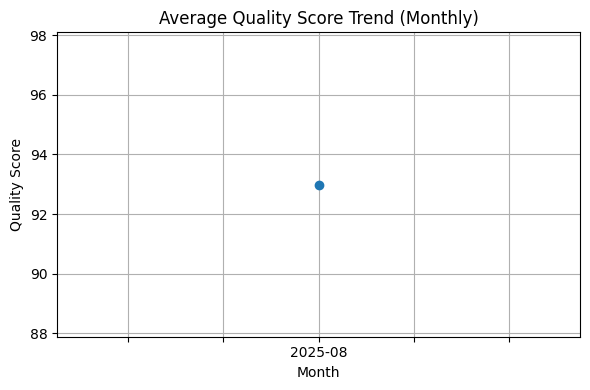

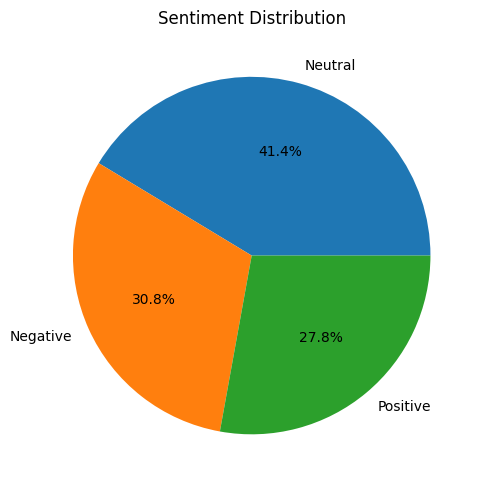

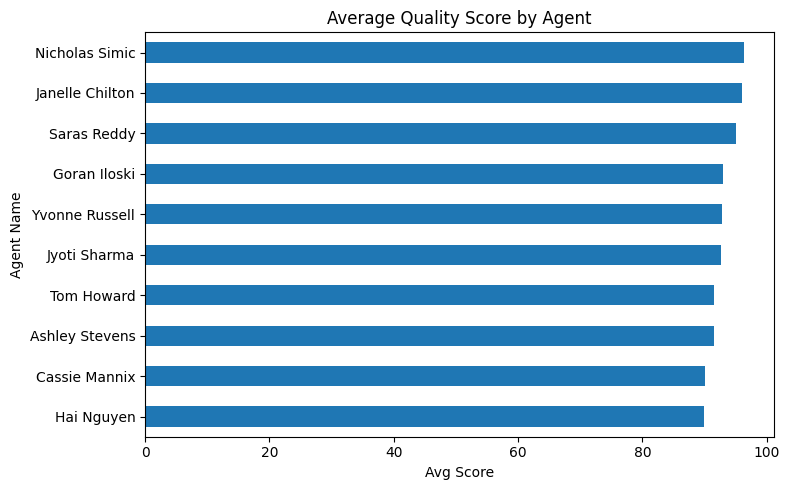

<Figure size 800x500 with 0 Axes>

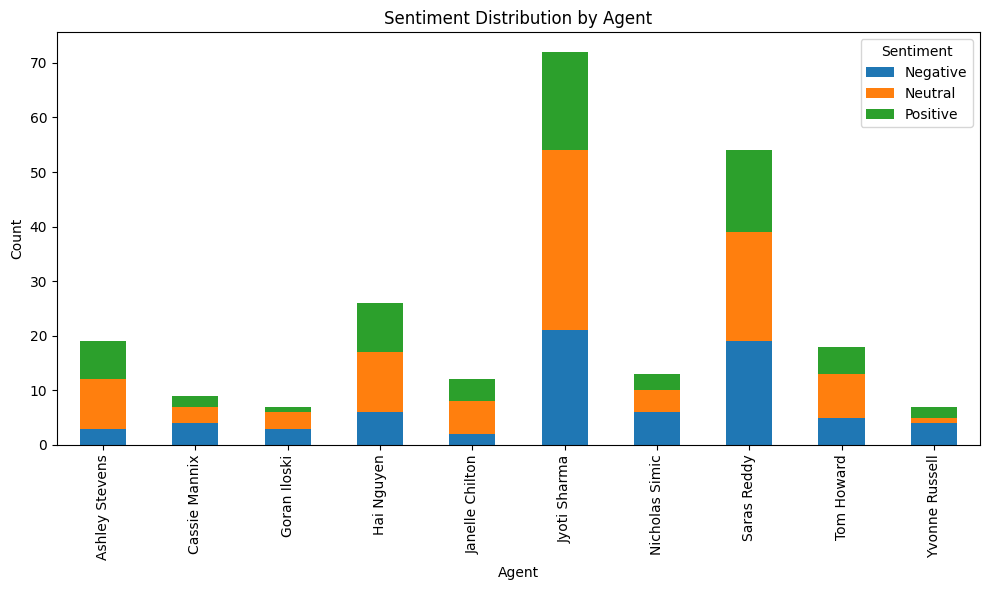

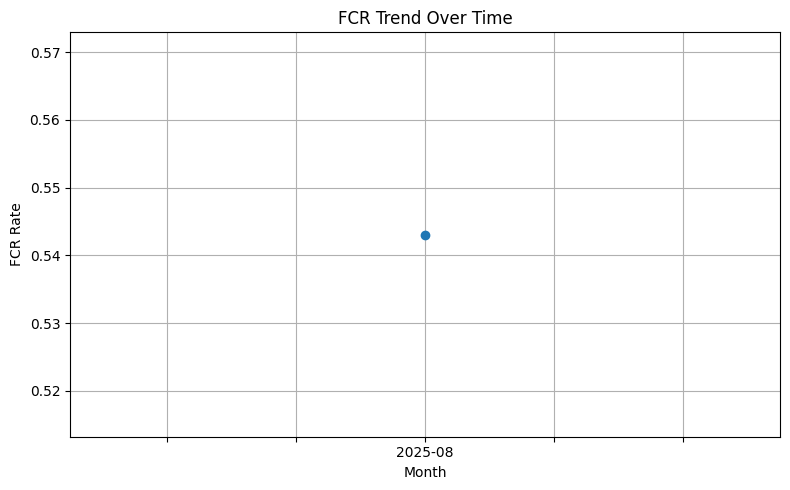

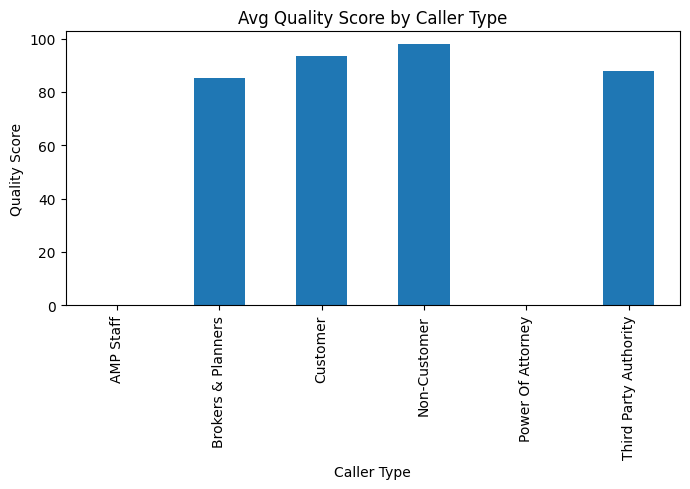

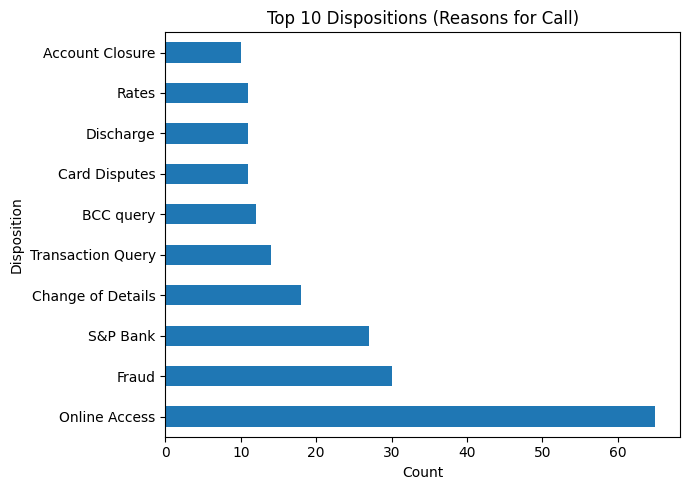

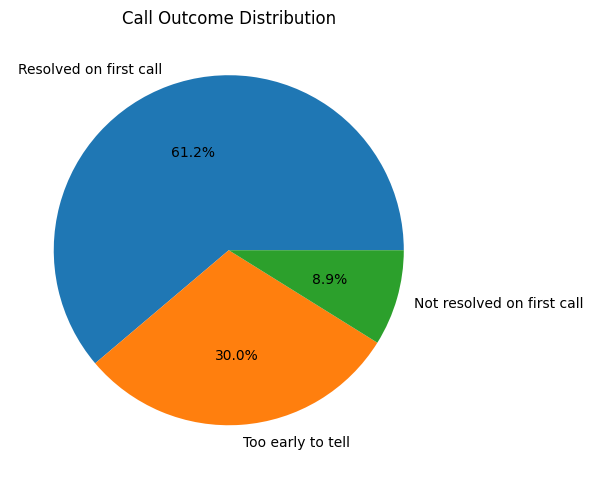

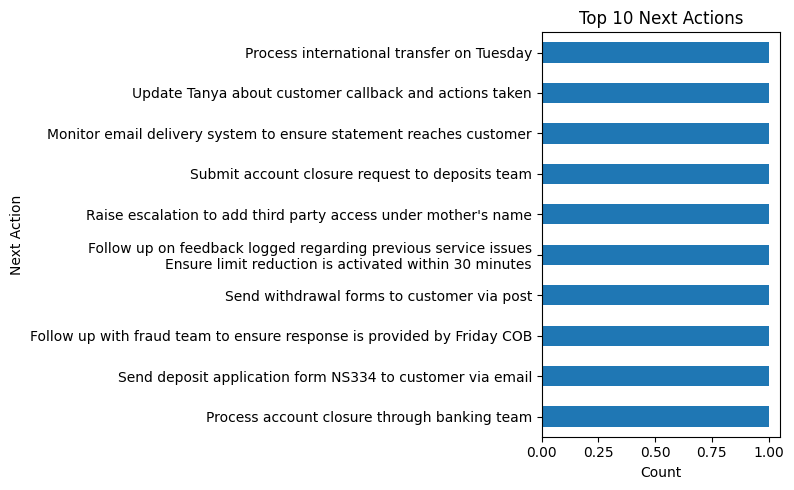

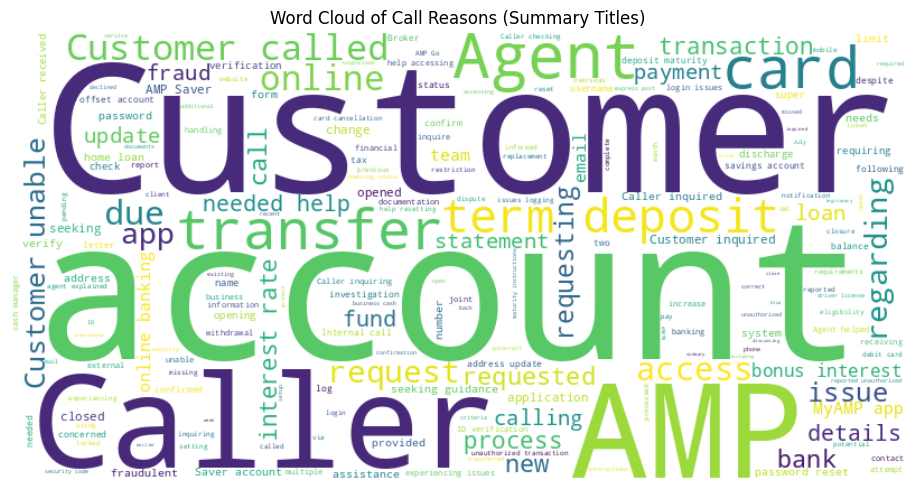

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 1. Load Data
file_path = "/content/drive/MyDrive/sample_1111.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Extract Week/Month for trends
df['Week'] = df['Timestamp'].dt.to_period('W').astype(str)
df['Month'] = df['Timestamp'].dt.to_period('M').astype(str)

# ============================
# 2. KPI Calculations
# ============================
total_calls = len(df)
avg_quality_score = df['Quality Score'].mean()
fcr_rate = (df['Call Outcome'] == "Resolved on first call").mean()
positive_rate = (df['Sentiment'] == "Positive").mean()
negative_rate = (df['Sentiment'] == "Negative").mean()

print("Total Calls:", total_calls)
print("Avg Quality Score:", avg_quality_score)
print("FCR Rate:", fcr_rate)
print("Positive Sentiment Rate:", positive_rate)
print("Negative Sentiment Rate:", negative_rate)

# ============================
# 3. Page 1: Executive Summary
# ============================
plt.figure(figsize=(6,4))
df.groupby("Month")["Quality Score"].mean().plot(marker="o")
plt.title("Average Quality Score Trend (Monthly)")
plt.ylabel("Quality Score")
plt.xlabel("Month")
plt.grid()
plt.tight_layout()
plt.savefig("page1_quality_trend.png")

plt.figure(figsize=(5,5))
df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Sentiment Distribution")
plt.ylabel("")
plt.tight_layout()
plt.savefig("page1_sentiment_pie.png")

# ============================
# 4. Page 2: Agent Performance
# ============================
plt.figure(figsize=(8,5))
df.groupby("Agent Name")["Quality Score"].mean().sort_values().plot(kind="barh")
plt.title("Average Quality Score by Agent")
plt.xlabel("Avg Score")
plt.tight_layout()
plt.savefig("page2_agent_quality.png")

plt.figure(figsize=(8,5))
sentiment_agent = pd.crosstab(df['Agent Name'], df['Sentiment'])
sentiment_agent.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Sentiment Distribution by Agent")
plt.xlabel("Agent")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("page2_agent_sentiment.png")

# ============================
# 5. Page 3: Customer Experience Trends
# ============================
plt.figure(figsize=(8,5))
df.groupby("Month")["Call Outcome"].apply(lambda x: (x=="Resolved on first call").mean()).plot(marker="o")
plt.title("FCR Trend Over Time")
plt.ylabel("FCR Rate")
plt.xlabel("Month")
plt.grid()
plt.tight_layout()
plt.savefig("page3_fcr_trend.png")

plt.figure(figsize=(7,5))
df.groupby("Caller Type")["Quality Score"].mean().plot(kind="bar")
plt.title("Avg Quality Score by Caller Type")
plt.ylabel("Quality Score")
plt.tight_layout()
plt.savefig("page3_caller_quality.png")

plt.figure(figsize=(7,5))
df['Disposition'].value_counts().head(10).plot(kind="barh")
plt.title("Top 10 Dispositions (Reasons for Call)")
plt.xlabel("Count")
plt.tight_layout()
plt.savefig("page3_disposition.png")

# ============================
# 6. Page 4: Call Outcomes & Next Actions
# ============================
plt.figure(figsize=(6,6))
df['Call Outcome'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Call Outcome Distribution")
plt.ylabel("")
plt.tight_layout()
plt.savefig("page4_outcome_pie.png")

plt.figure(figsize=(8,5))
df['Next Action'].value_counts().head(10).plot(kind="barh")
plt.title("Top 10 Next Actions")
plt.xlabel("Count")
plt.tight_layout()
plt.savefig("page4_next_action.png")

# ============================
# 7. Page 5: Transcript / NLP Insights
# ============================
# Word Cloud from Summary Titles
text = " ".join(str(t) for t in df['Summary Title'].dropna())
wc = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Call Reasons (Summary Titles)")
plt.tight_layout()
plt.savefig("page5_wordcloud.png")

# ============================
# END
# ============================
print("✅ All charts generated. PNGs saved for PPT import.")


Total Calls: 267
Avg Quality Score: 92.99090909090908
FCR Rate: 0.5430711610486891
Positive Sentiment Rate: 0.24719101123595505
Negative Sentiment Rate: 0.27340823970037453
✅ All charts generated. PNGs saved for PPT import.


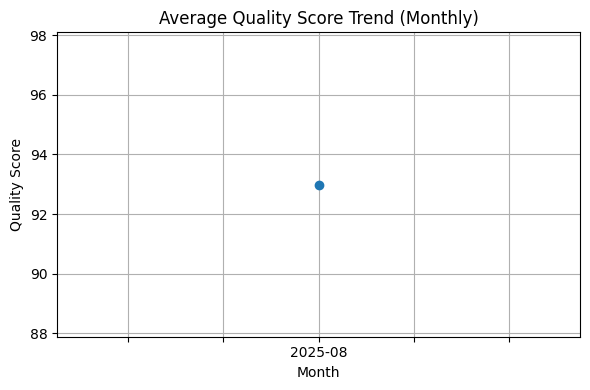

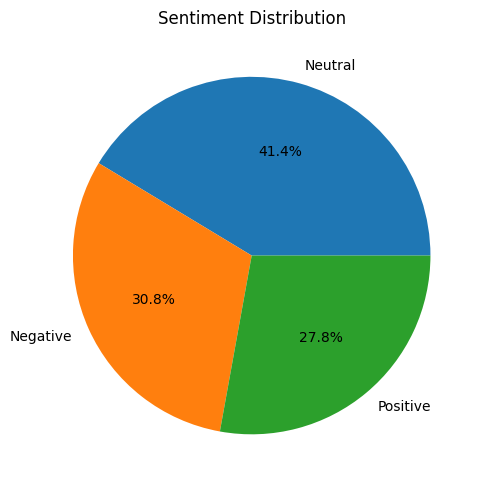

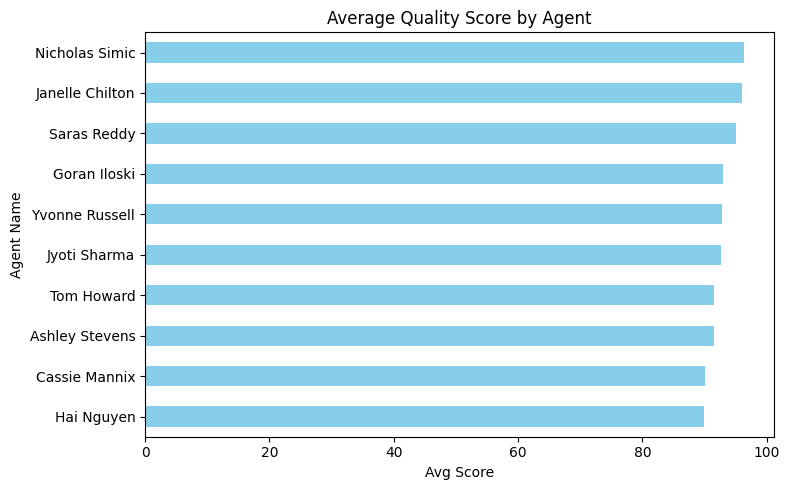

<Figure size 1000x600 with 0 Axes>

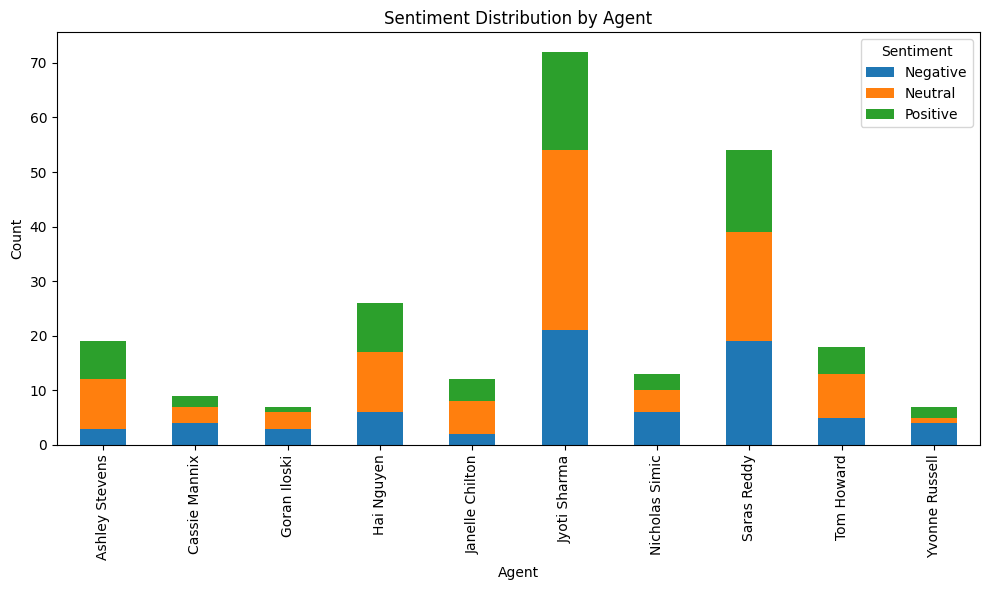

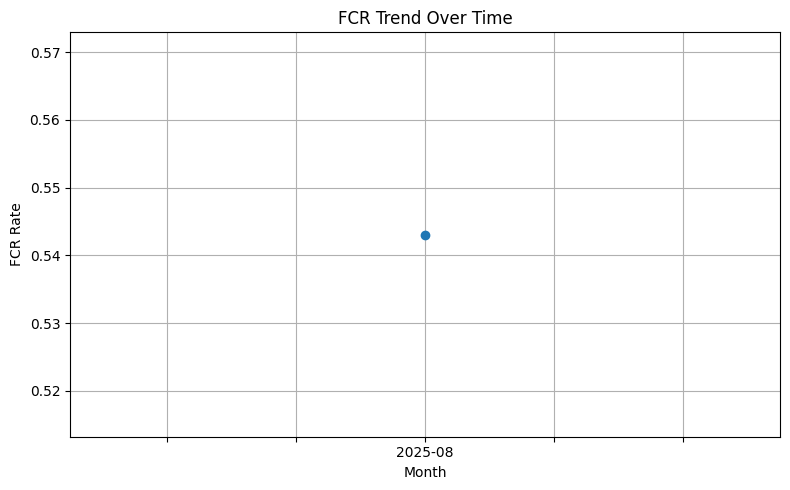

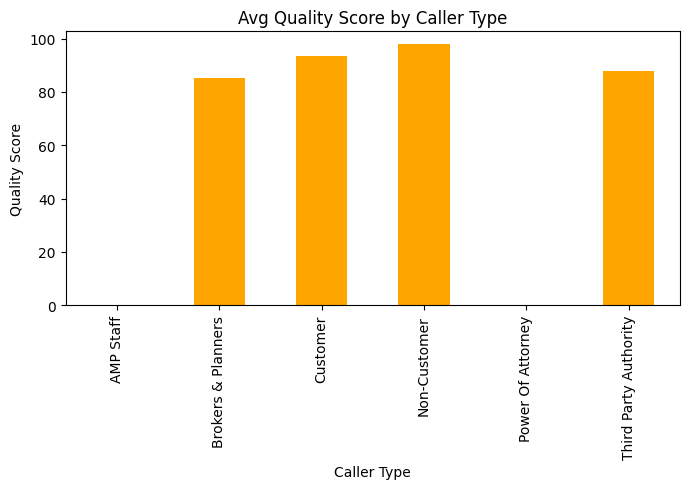

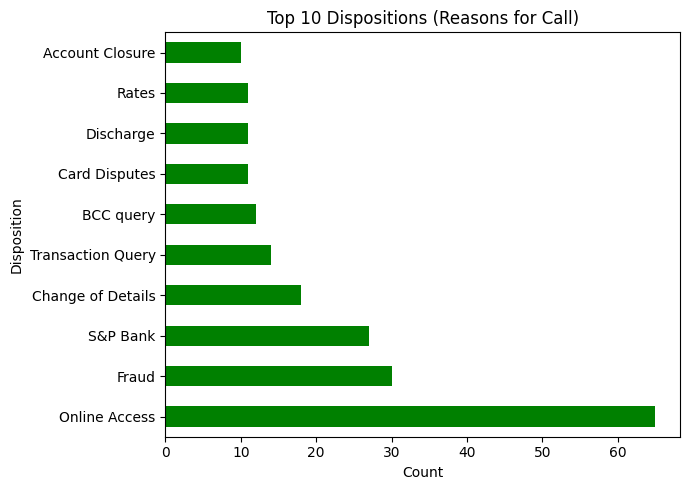

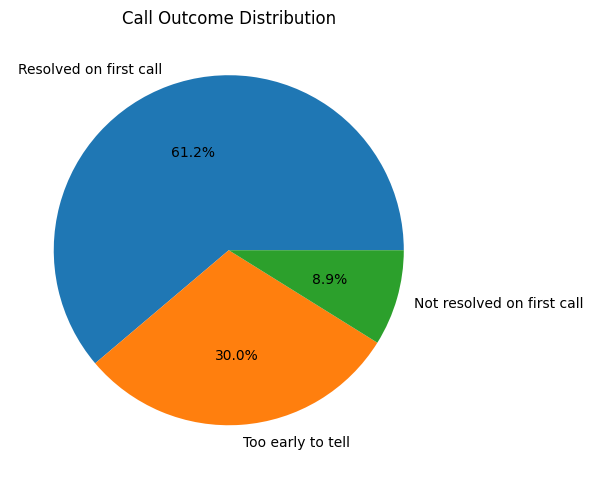

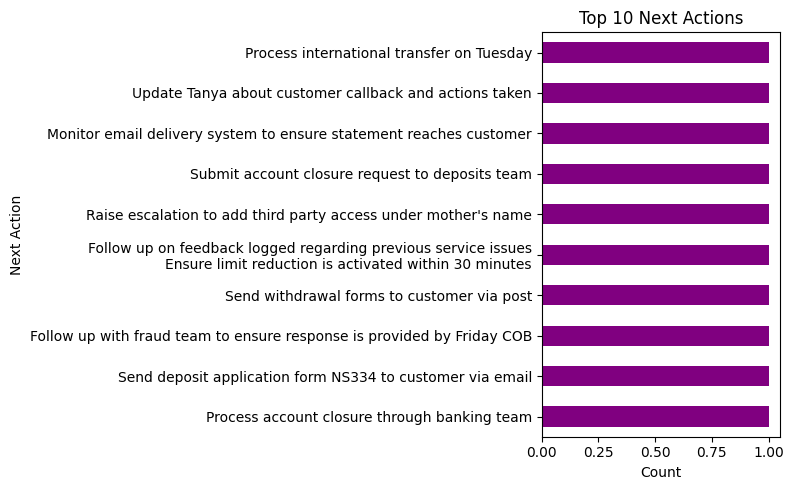

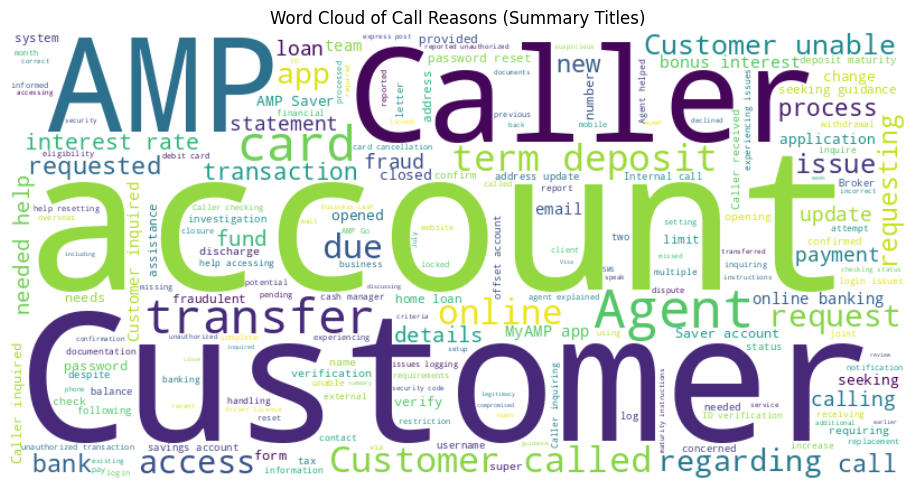

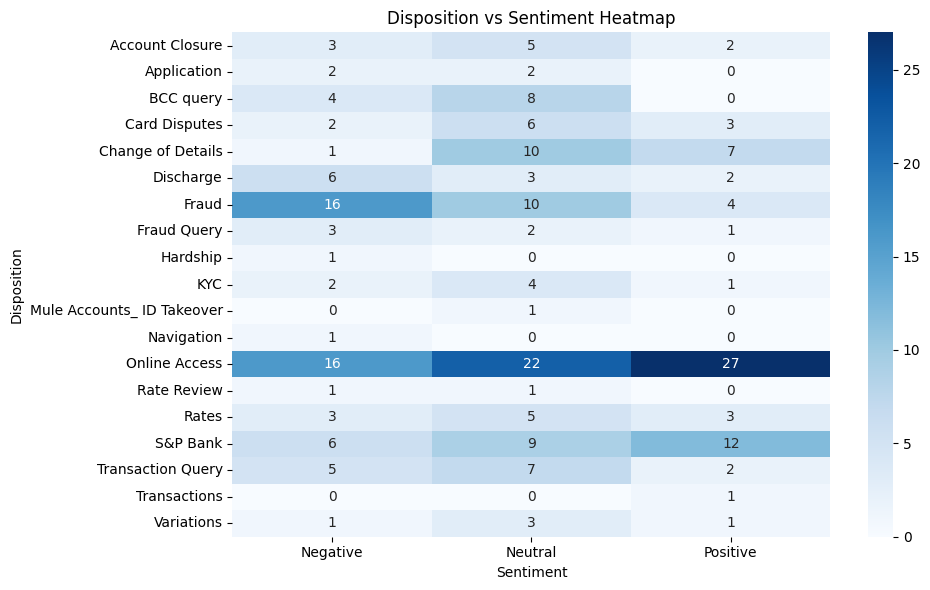

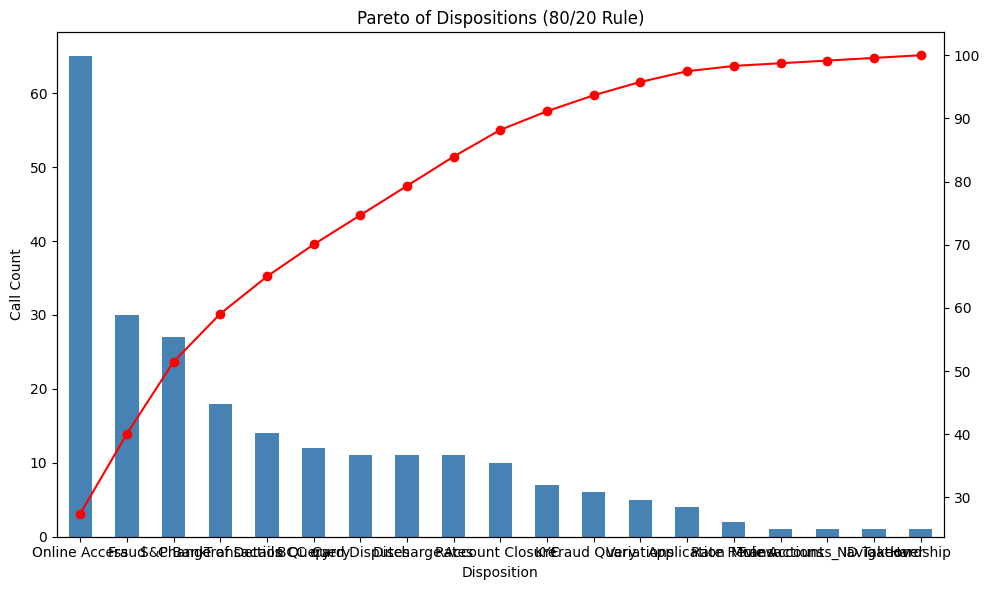

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# ================================
# 1. Load and Prepare Data
# ================================
file_path = "/content/drive/MyDrive/sample_1111.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Extract week and month for trends
df['Week'] = df['Timestamp'].dt.to_period('W').astype(str)
df['Month'] = df['Timestamp'].dt.to_period('M').astype(str)

# ================================
# 2. KPI Calculations
# ================================
total_calls = len(df)
avg_quality_score = df['Quality Score'].mean()
fcr_rate = (df['Call Outcome'] == "Resolved on first call").mean()
positive_rate = (df['Sentiment'] == "Positive").mean()
negative_rate = (df['Sentiment'] == "Negative").mean()

print("Total Calls:", total_calls)
print("Avg Quality Score:", avg_quality_score)
print("FCR Rate:", fcr_rate)
print("Positive Sentiment Rate:", positive_rate)
print("Negative Sentiment Rate:", negative_rate)

# ================================
# 3. Page 1 – Executive Summary
# ================================
plt.figure(figsize=(6,4))
df.groupby("Month")["Quality Score"].mean().plot(marker="o")
plt.title("Average Quality Score Trend (Monthly)")
plt.ylabel("Quality Score")
plt.xlabel("Month")
plt.grid()
plt.tight_layout()
plt.savefig("page1_quality_trend.png")

plt.figure(figsize=(5,5))
df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Sentiment Distribution")
plt.ylabel("")
plt.tight_layout()
plt.savefig("page1_sentiment_pie.png")

# ================================
# 4. Page 2 – Agent Performance
# ================================
plt.figure(figsize=(8,5))
df.groupby("Agent Name")["Quality Score"].mean().sort_values().plot(kind="barh", color="skyblue")
plt.title("Average Quality Score by Agent")
plt.xlabel("Avg Score")
plt.tight_layout()
plt.savefig("page2_agent_quality.png")

plt.figure(figsize=(10,6))
sentiment_agent = pd.crosstab(df['Agent Name'], df['Sentiment'])
sentiment_agent.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Sentiment Distribution by Agent")
plt.xlabel("Agent")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("page2_agent_sentiment.png")

# ================================
# 5. Page 3 – Customer Experience Trends
# ================================
plt.figure(figsize=(8,5))
df.groupby("Month")["Call Outcome"].apply(lambda x: (x=="Resolved on first call").mean()).plot(marker="o")
plt.title("FCR Trend Over Time")
plt.ylabel("FCR Rate")
plt.xlabel("Month")
plt.grid()
plt.tight_layout()
plt.savefig("page3_fcr_trend.png")

plt.figure(figsize=(7,5))
df.groupby("Caller Type")["Quality Score"].mean().plot(kind="bar", color="orange")
plt.title("Avg Quality Score by Caller Type")
plt.ylabel("Quality Score")
plt.tight_layout()
plt.savefig("page3_caller_quality.png")

plt.figure(figsize=(7,5))
df['Disposition'].value_counts().head(10).plot(kind="barh", color="green")
plt.title("Top 10 Dispositions (Reasons for Call)")
plt.xlabel("Count")
plt.tight_layout()
plt.savefig("page3_disposition.png")

# ================================
# 6. Page 4 – Call Outcomes & Next Actions
# ================================
plt.figure(figsize=(6,6))
df['Call Outcome'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Call Outcome Distribution")
plt.ylabel("")
plt.tight_layout()
plt.savefig("page4_outcome_pie.png")

plt.figure(figsize=(8,5))
df['Next Action'].value_counts().head(10).plot(kind="barh", color="purple")
plt.title("Top 10 Next Actions")
plt.xlabel("Count")
plt.tight_layout()
plt.savefig("page4_next_action.png")

# ================================
# 7. Page 5 – Transcript / NLP Insights
# ================================
# Word Cloud from Summary Titles
text = " ".join(str(t) for t in df['Summary Title'].dropna())
wc = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Call Reasons (Summary Titles)")
plt.tight_layout()
plt.savefig("page5_wordcloud.png")

# ================================
# 8. Extra Advanced Visuals (Optional Inserts)
# ================================
# Heatmap: Disposition vs Sentiment
plt.figure(figsize=(10,6))
heatmap_data = pd.crosstab(df['Disposition'], df['Sentiment'])
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Blues")
plt.title("Disposition vs Sentiment Heatmap")
plt.tight_layout()
plt.savefig("extra_heatmap.png")

# Pareto Chart: Dispositions
plt.figure(figsize=(10,6))
dispositions = df['Disposition'].value_counts()
cumulative = dispositions.cumsum()/dispositions.sum()*100
ax = dispositions.plot(kind="bar", color="steelblue")
cumulative.plot(secondary_y=True, color="red", marker="o")
ax.set_ylabel("Call Count")
plt.title("Pareto of Dispositions (80/20 Rule)")
plt.tight_layout()
plt.savefig("extra_pareto.png")

# ================================
# END
# ================================
print("✅ All charts generated. PNGs saved for PPT import.")


In [ ]:
#Blockwise

In [22]:
pip install squarify

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import squarify  # for treemap
from collections import Counter

# Load data
file_path = "/content/drive/MyDrive/sample_1111.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Convert timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Week'] = df['Timestamp'].dt.to_period('W').apply(lambda r: r.start_time)

# Basic KPIs
total_calls = len(df)
avg_quality = df['Quality Score'].mean()
fcr_rate = (df['Call Outcome'] == "Resolved on first call").mean()
pos_rate = (df['Sentiment'] == "Positive").mean()
neg_rate = (df['Sentiment'] == "Negative").mean()

print("Total Calls:", total_calls)
print("Avg Quality:", round(avg_quality,2))
print("FCR Rate:", round(fcr_rate*100,2), "%")
print("Positive Sentiment:", round(pos_rate*100,2), "%")
print("Negative Sentiment:", round(neg_rate*100,2), "%")


Total Calls: 267
Avg Quality: 92.99
FCR Rate: 54.31 %
Positive Sentiment: 24.72 %
Negative Sentiment: 27.34 %


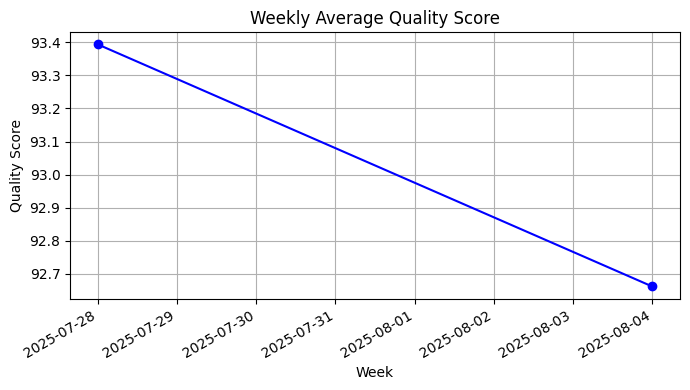

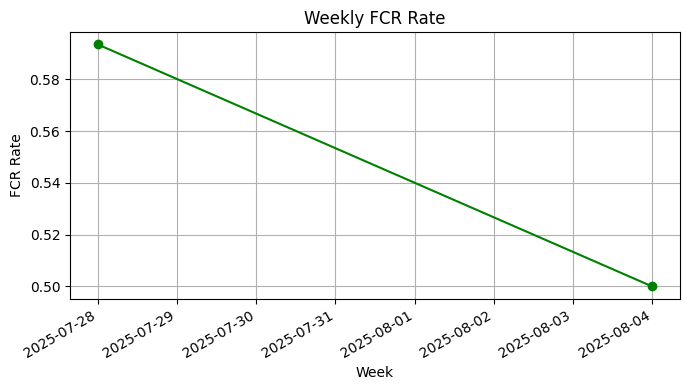

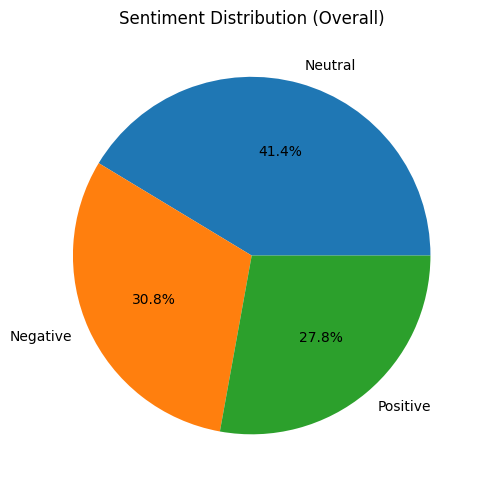

In [24]:
# Weekly Quality Score
plt.figure(figsize=(7,4))
df.groupby("Week")["Quality Score"].mean().plot(marker="o", color="blue")
plt.title("Weekly Average Quality Score")
plt.ylabel("Quality Score")
plt.xlabel("Week")
plt.grid()
plt.tight_layout()
plt.savefig("weekly_quality.png")

# Weekly FCR
plt.figure(figsize=(7,4))
df.groupby("Week")["Call Outcome"].apply(lambda x: (x=="Resolved on first call").mean()).plot(marker="o", color="green")
plt.title("Weekly FCR Rate")
plt.ylabel("FCR Rate")
plt.xlabel("Week")
plt.grid()
plt.tight_layout()
plt.savefig("weekly_fcr.png")

# Sentiment Distribution
plt.figure(figsize=(5,5))
df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Sentiment Distribution (Overall)")
plt.ylabel("")
plt.tight_layout()
plt.savefig("sentiment_pie.png")


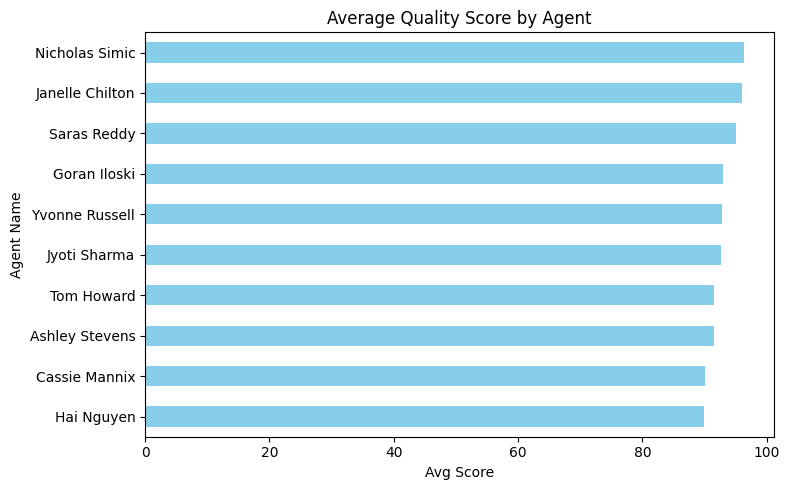

<Figure size 1000x600 with 0 Axes>

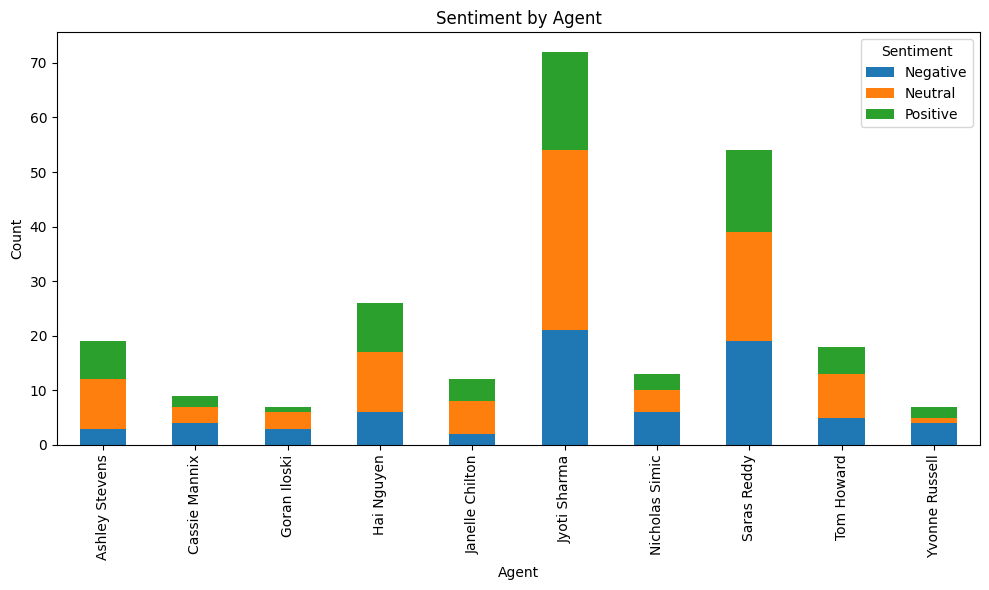

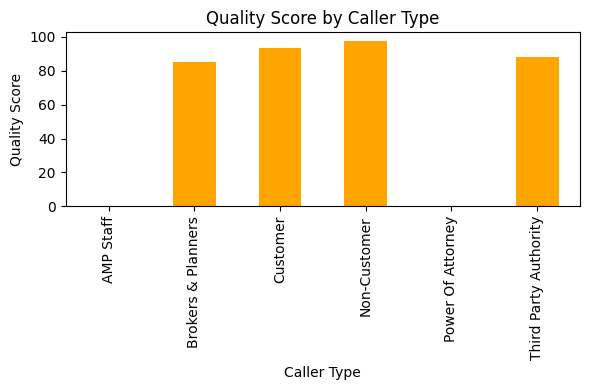

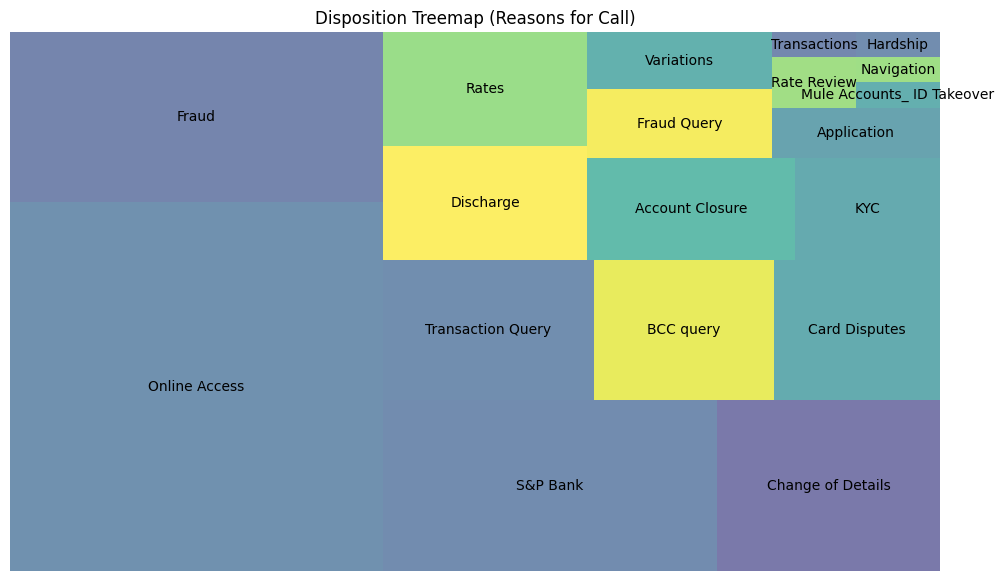

In [25]:
# Agent quality score
plt.figure(figsize=(8,5))
df.groupby("Agent Name")["Quality Score"].mean().sort_values().plot(kind="barh", color="skyblue")
plt.title("Average Quality Score by Agent")
plt.xlabel("Avg Score")
plt.tight_layout()
plt.savefig("agent_quality.png")

# Sentiment by agent
plt.figure(figsize=(10,6))
sentiment_agent = pd.crosstab(df['Agent Name'], df['Sentiment'])
sentiment_agent.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Sentiment by Agent")
plt.xlabel("Agent")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("agent_sentiment.png")

# Caller type quality
plt.figure(figsize=(6,4))
df.groupby("Caller Type")["Quality Score"].mean().plot(kind="bar", color="orange")
plt.title("Quality Score by Caller Type")
plt.ylabel("Quality Score")
plt.tight_layout()
plt.savefig("caller_quality.png")

# Treemap for dispositions
plt.figure(figsize=(12,7))
dispo_counts = df['Disposition'].value_counts()
squarify.plot(sizes=dispo_counts.values, label=dispo_counts.index, alpha=0.7)
plt.title("Disposition Treemap (Reasons for Call)")
plt.axis("off")
plt.savefig("disposition_treemap.png")


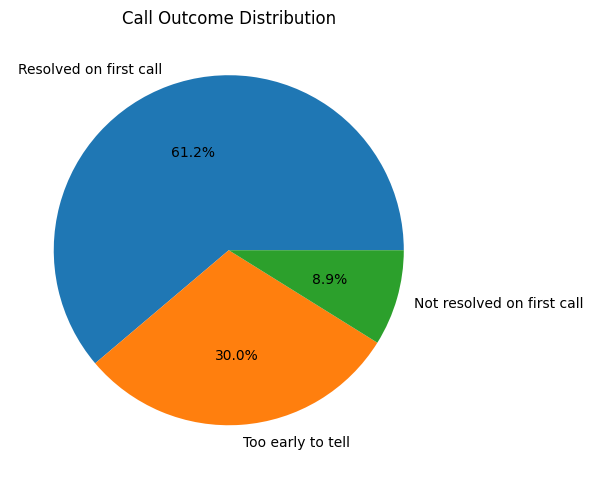

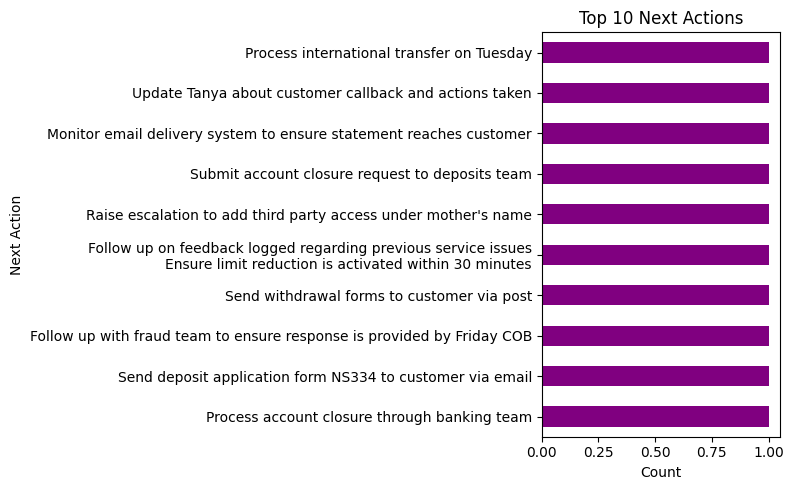

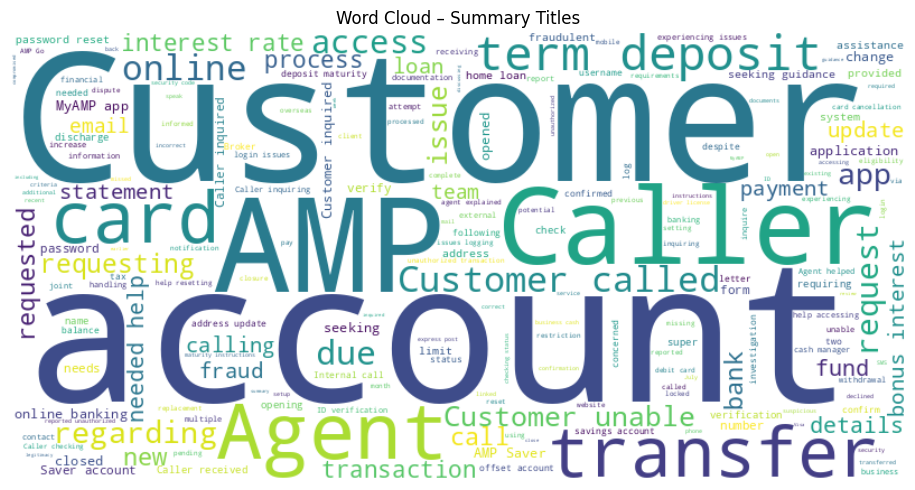

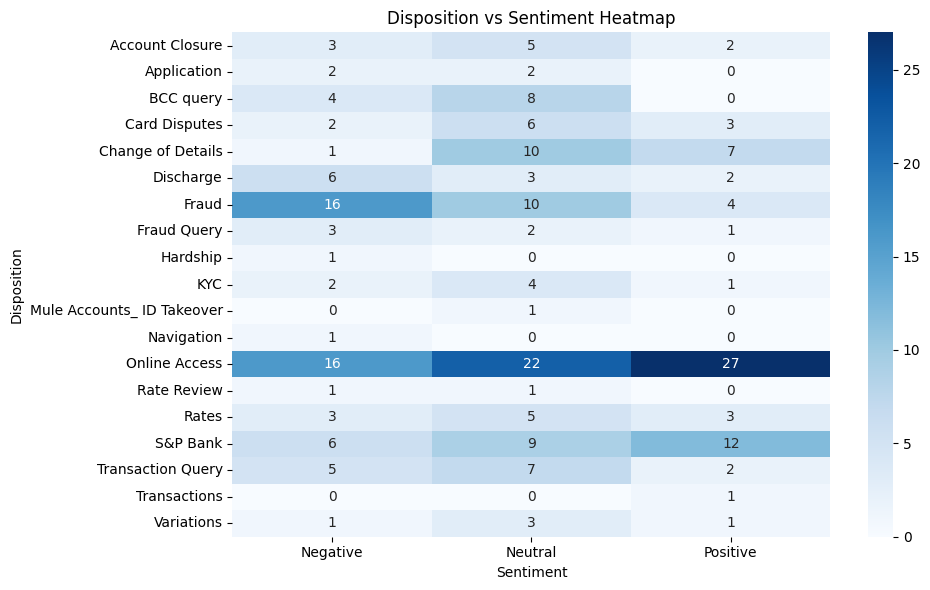

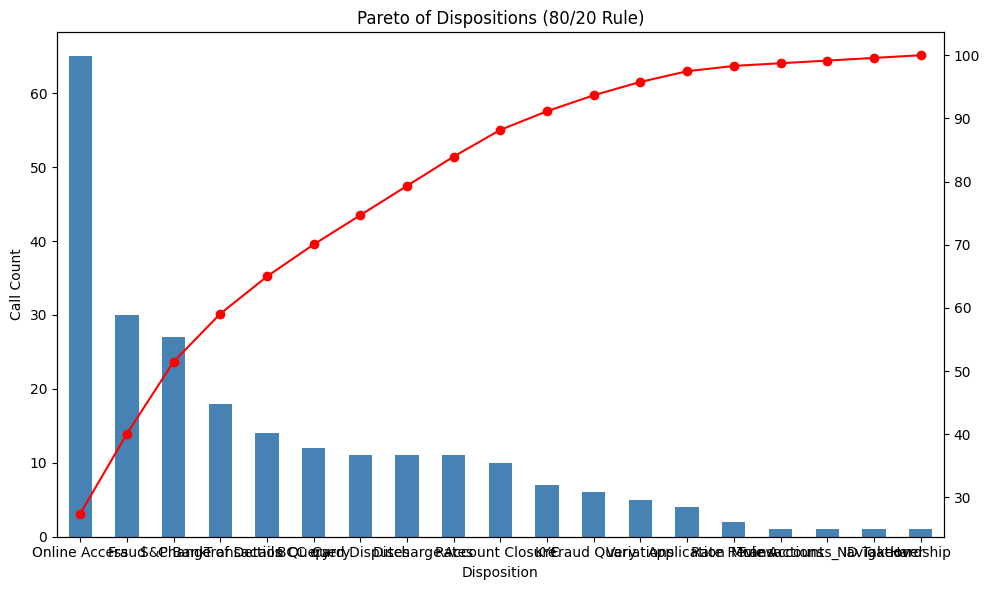

In [26]:
# Call outcome pie
plt.figure(figsize=(6,6))
df['Call Outcome'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Call Outcome Distribution")
plt.ylabel("")
plt.tight_layout()
plt.savefig("call_outcome.png")

# Next action bar
plt.figure(figsize=(8,5))
df['Next Action'].value_counts().head(10).plot(kind="barh", color="purple")
plt.title("Top 10 Next Actions")
plt.xlabel("Count")
plt.tight_layout()
plt.savefig("next_actions.png")

# Word cloud from Summary Title
text = " ".join(str(t) for t in df['Summary Title'].dropna())
wc = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud – Summary Titles")
plt.tight_layout()
plt.savefig("summary_wordcloud.png")

# Heatmap: Disposition vs Sentiment
plt.figure(figsize=(10,6))
heatmap_data = pd.crosstab(df['Disposition'], df['Sentiment'])
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Blues")
plt.title("Disposition vs Sentiment Heatmap")
plt.tight_layout()
plt.savefig("disposition_sentiment_heatmap.png")

# Pareto chart – Dispositions
plt.figure(figsize=(10,6))
dispositions = df['Disposition'].value_counts()
cumulative = dispositions.cumsum()/dispositions.sum()*100
ax = dispositions.plot(kind="bar", color="steelblue")
cumulative.plot(secondary_y=True, color="red", marker="o")
ax.set_ylabel("Call Count")
plt.title("Pareto of Dispositions (80/20 Rule)")
plt.tight_layout()
plt.savefig("disposition_pareto.png")
